In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\user\Downloads\archive\exams.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [9]:

df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.shape

(1000, 8)

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [16]:
df=df.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"Education","test preparation course":"test_preparation_course",
                     "math score":"math_score","reading_score":"reading_score","writing score":"writing_score"})
df.head()



,gender,race_ethnicity,Education,lunch,test_preparation_course,math_score,reading score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [24]:
def bar_plot(variable):

    var = df[variable]
    
    varValue = var.value_counts()
    

    plt.figure(figsize =(5,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

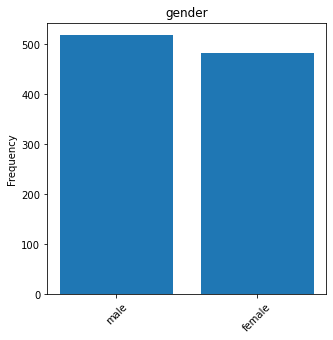

gender: 
 male      517
female    483
Name: gender, dtype: int64


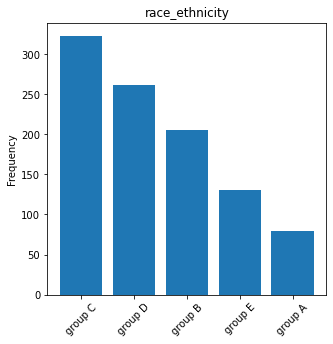

race_ethnicity: 
 group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64


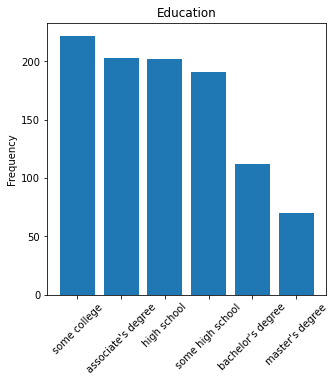

Education: 
 some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64


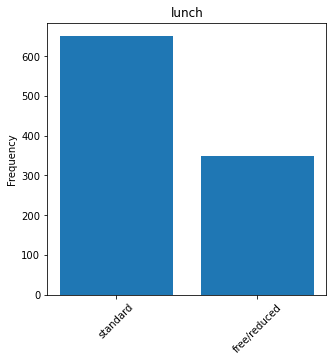

lunch: 
 standard        652
free/reduced    348
Name: lunch, dtype: int64


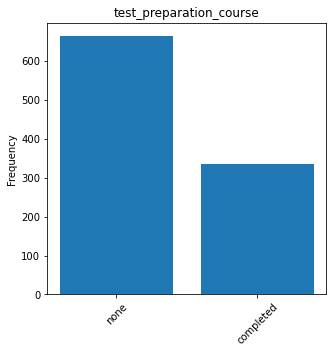

test_preparation_course: 
 none         665
completed    335
Name: test_preparation_course, dtype: int64


In [27]:
category=["gender","race_ethnicity","Education","lunch","test_preparation_course"]

for c in category:
   

    bar_plot(c)

In [28]:
df.race_ethnicity.value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

<AxesSubplot:xlabel='race_ethnicity', ylabel='count'>

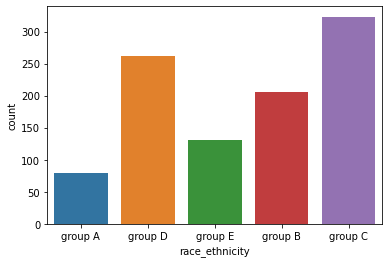

In [29]:
sns.countplot(data=df,x="race_ethnicity")

In [30]:
df[df.gender=="female"].race_ethnicity.value_counts(normalize=True)

group C    0.318841
group D    0.260870
group B    0.236025
group E    0.107660
group A    0.076605
Name: race_ethnicity, dtype: float64

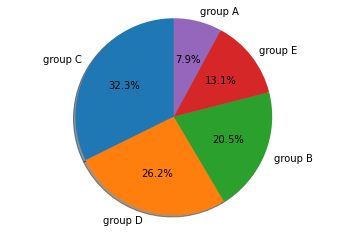

In [34]:
labels = df["race_ethnicity"].value_counts().index
sizes = df["race_ethnicity"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

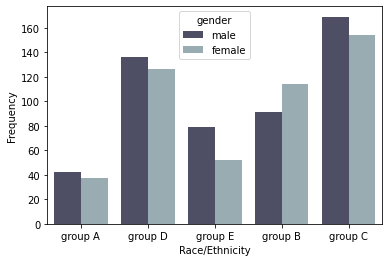

In [35]:
sns.countplot(x=df['race_ethnicity'],hue=df["gender"],palette="bone")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Frequency")
plt.show()

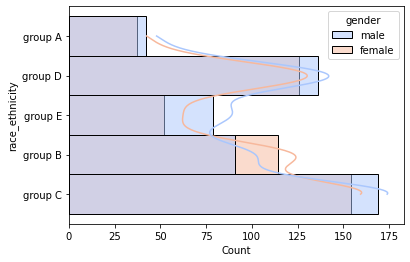

In [36]:
sns.histplot(data=df,y="race_ethnicity",hue="gender",palette="coolwarm",kde=True)
plt.show()

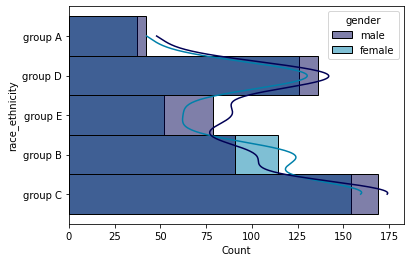

In [37]:
sns.histplot(data=df,y="race_ethnicity",hue="gender",palette="ocean",kde=True)
plt.show()

In [38]:
df[df.gender=="female"].race_ethnicity.value_counts()


group C    154
group D    126
group B    114
group E     52
group A     37
Name: race_ethnicity, dtype: int64

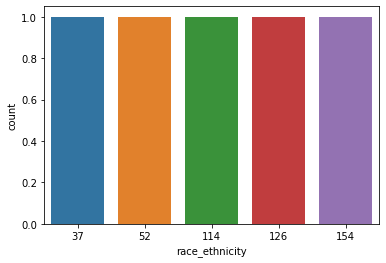

In [39]:
sns.countplot(data=df , x=df[df.gender=="female"].race_ethnicity.value_counts())
plt.show()

In [40]:
df.Education.value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: Education, dtype: int64

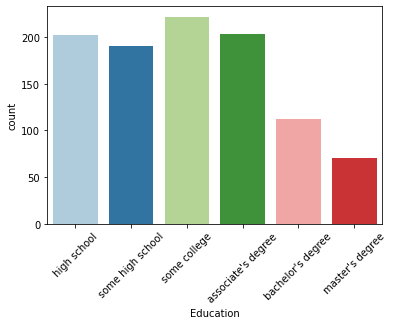

In [42]:
plt.xticks(rotation=45)
sns.countplot(data=df,x="Education",palette="Paired")
plt.show()


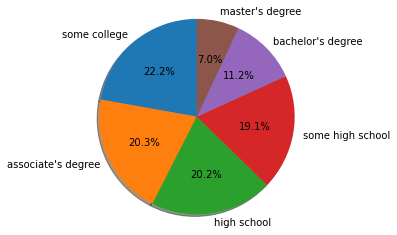

In [43]:
labels = df["Education"].value_counts().index
sizes = df["Education"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [44]:
df.gender.value_counts()

male      517
female    483
Name: gender, dtype: int64

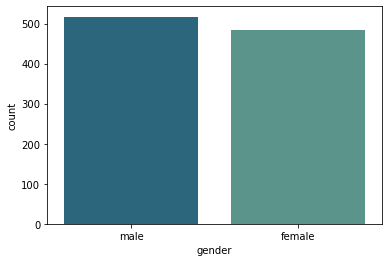

In [45]:
sns.countplot(data=df,x="gender",palette="crest_r")
plt.show()

In [47]:
df.lunch.value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

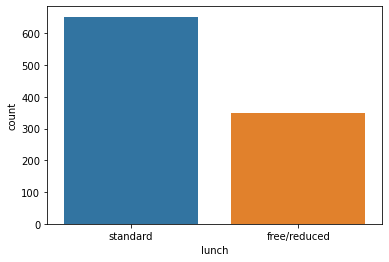

In [49]:
sns.countplot(data=df,x="lunch")
plt.show()

In [50]:
df.test_preparation_course.value_counts()

none         665
completed    335
Name: test_preparation_course, dtype: int64

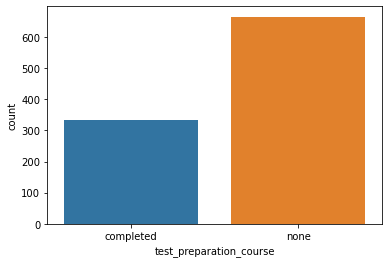

In [51]:
sns.countplot(data=df,x="test_preparation_course")
plt.show()

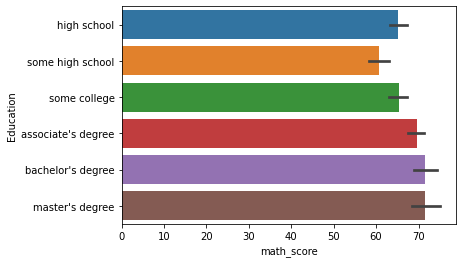

In [52]:
sns.barplot(data=df,x="math_score",y="Education")
plt.show()

In [53]:
df.head()

,gender,race_ethnicity,Education,lunch,test_preparation_course,math_score,reading score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


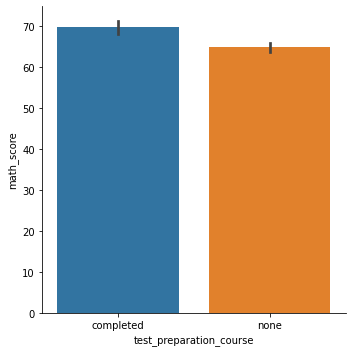

In [54]:
sns.catplot(data=df,x="test_preparation_course",y="math_score",kind ="bar")
plt.show()

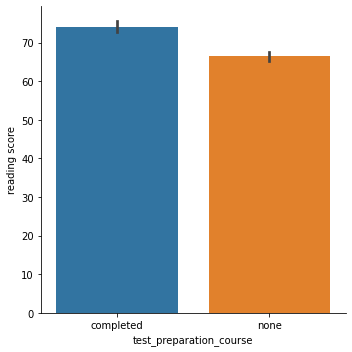

In [56]:
sns.catplot(data=df,x="test_preparation_course",y="reading score",kind ="bar")
plt.show()

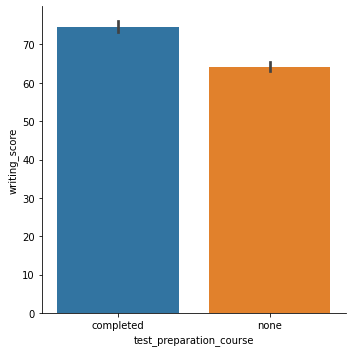

In [57]:
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind ="bar")
plt.show()

In [59]:
y=df[["Education","math_score","reading score","writing_score"]].groupby(["Education"]).mean().sort_values(by="math_score",ascending = False)
y

,math_score,reading score,writing_score
Education,,,
master's degree,71.585714,75.428571,75.885714
bachelor's degree,71.491071,74.008929,74.410714
associate's degree,69.536946,70.985222,70.113300
some college,65.297297,68.045045,66.734234
high school,65.207921,67.400990,64.846535
some high school,60.701571,64.408377,62.539267


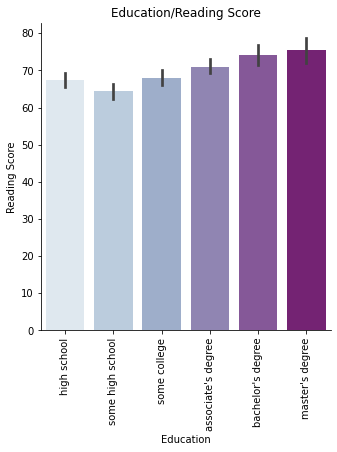

In [61]:
sns.catplot(data=df,x="Education", y="reading score", kind="bar",palette="BuPu")
plt.xticks(rotation=90)
plt.xlabel("Education")
plt.ylabel("Reading Score")
plt.title("Education/Reading Score")
plt.show()

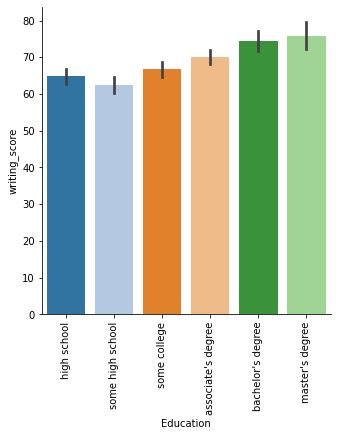

In [62]:
sns.catplot(data=df,x="Education",y="writing_score",kind="bar",palette="tab20")
plt.xticks(rotation=90)
plt.show()

In [63]:
a=df.groupby(["race_ethnicity"])["math_score"].mean()
a

race_ethnicity
group A    65.215190
group B    63.170732
group C    63.130031
group D    69.267176
group E    74.465649
Name: math_score, dtype: float64

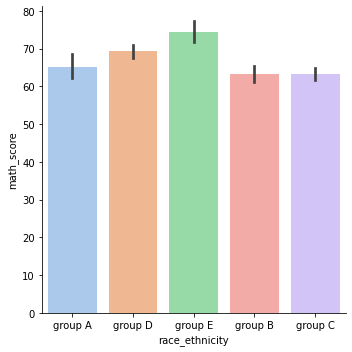

In [64]:


sns.catplot(kind="bar",x="race_ethnicity",y="math_score",data=df,palette="pastel")
plt.show()



In [66]:


df.groupby(["race_ethnicity"])["reading score"].mean()



race_ethnicity
group A    68.556962
group B    67.102439
group C    66.383901
group D    72.087786
group E    72.526718
Name: reading score, dtype: float64

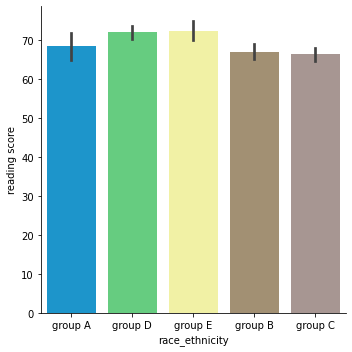

In [68]:
sns.catplot(kind="bar",x="race_ethnicity",y="reading score",data=df,palette="terrain")
plt.show()

In [69]:
df.groupby(["race_ethnicity"])["writing_score"].mean()

race_ethnicity
group A    66.974684
group B    65.736585
group C    64.523220
group D    72.259542
group E    70.213740
Name: writing_score, dtype: float64

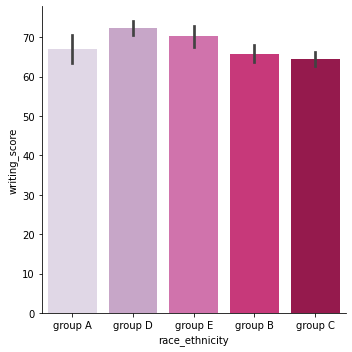

In [70]:
sns.catplot(kind="bar",x="race_ethnicity",y="writing_score",data=df,palette="PuRd")
plt.show()